In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
df_clean = pd.read_csv('clean_resume_data.csv')

In [3]:
df_clean.head(2)

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...


In [4]:
df_clean['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
FINANCE                   118
ENGINEERING               118
ACCOUNTANT                118
FITNESS                   117
AVIATION                  117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [5]:
df_clean.shape

(2484, 3)

## Balance Dataset
O balanceamento tenta deixar todas as categorias com quantidades parecidas

In [6]:
from sklearn.utils import resample

#achar a maior categoria

max_value = df_clean['Category'].value_counts().max()

# agrupar por tipo categoria = profissão
balanced_df = pd.concat([resample(df_clean[df_clean['Category'] == cat], n_samples=max_value, replace=True, random_state=42) for cat in df_clean['Category'].unique()], ignore_index=True)

In [7]:
balanced_df["Category"].value_counts()


Category
HR                        120
DESIGNER                  120
INFORMATION-TECHNOLOGY    120
TEACHER                   120
ADVOCATE                  120
BUSINESS-DEVELOPMENT      120
HEALTHCARE                120
FITNESS                   120
AGRICULTURE               120
BPO                       120
SALES                     120
CONSULTANT                120
DIGITAL-MEDIA             120
AUTOMOBILE                120
CHEF                      120
FINANCE                   120
APPAREL                   120
ENGINEERING               120
ACCOUNTANT                120
CONSTRUCTION              120
PUBLIC-RELATIONS          120
BANKING                   120
ARTS                      120
AVIATION                  120
Name: count, dtype: int64

In [8]:
balanced_df.shape

(2880, 3)

In [10]:
# balanced_df.isnull().sum()
balanced_df.dropna(inplace=True)

### Train Test Split:

x = entrada (dados que o modelo recebe)
y = saída (o que o modelo deve aprender a prever)

In [11]:
X = balanced_df['Feature']
y = balanced_df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Encoding (TF-IDF):
Transforma cada palavra em um número, porque o ML não entende texto, apenas números
E esse número irá dizer o quanto cada palavra é importante nesse contexto

In [12]:
tfidf_vectorizer = TfidfVectorizer()

#.fit vai ler todo o texto e aprender quais palavras existem
# _transform transforma cada curriculo em uma lista de numeros (vetor)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# apenas transforma o testo de teste em um lista de numeros (vetor) sem treina-los 
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Random Forest
Cria várias árvores de decisão

In [13]:
from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()

#Ensina o modelo -> treina o modelo
rf_classifier.fit(X_train_tfidf, y_train)

# cria as previsões recebendo os dados da lista de teste (obs: que n foram usados no treino)
y_pred = rf_classifier.predict(X_test_tfidf)

#Medir a acurácia do modelo:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8750


# Matriz de Confusão
Isso cria uma tabela que mostra:
  ->  Onde o modelo está se confundindo

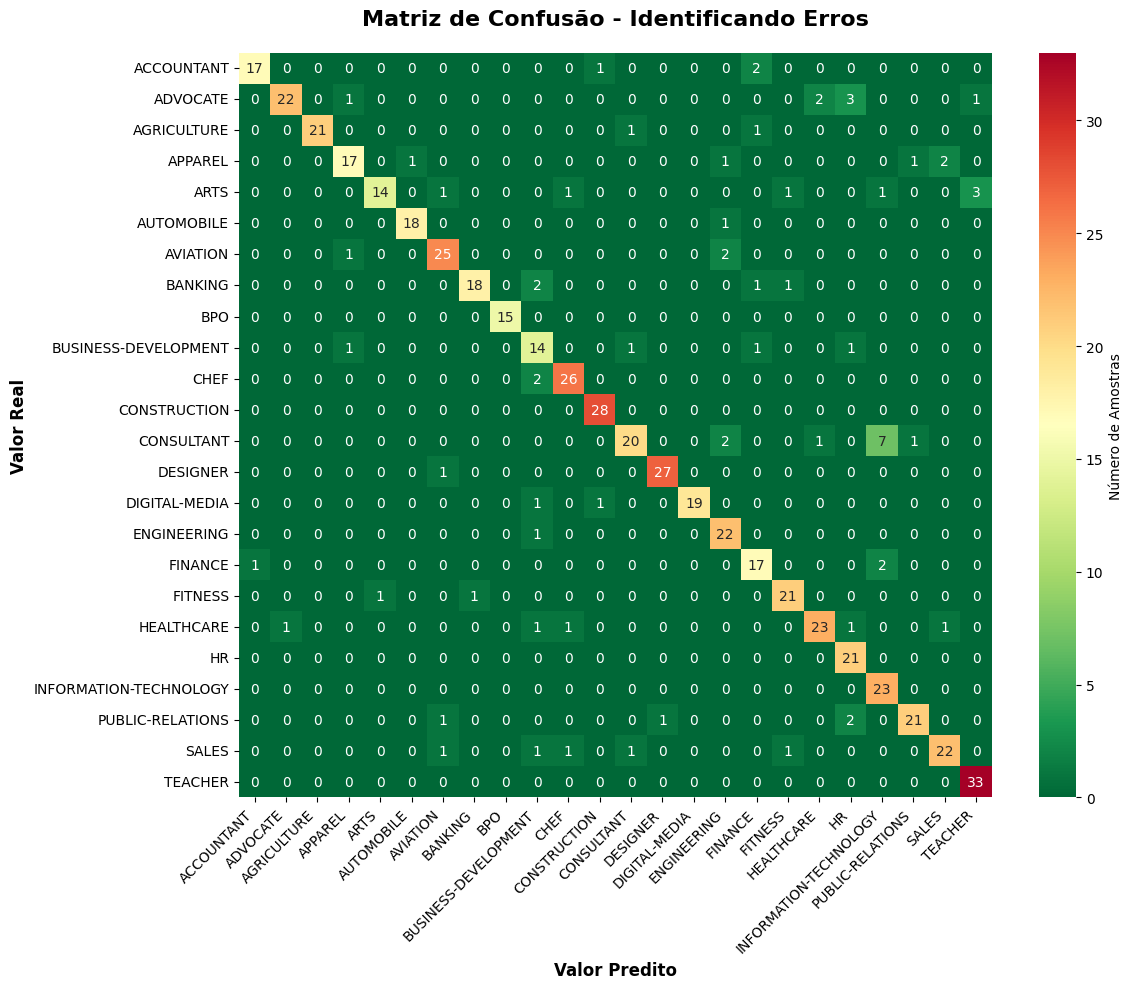


🎯 Acurácia: 87.50%


In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12, 10))

# Heatmap com valores anotados
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn_r', 
            xticklabels=sorted(y_test.unique()), 
            yticklabels=sorted(y_test.unique()),
            cbar_kws={'label': 'Número de Amostras'},
            ax=ax)

ax.set_title('Matriz de Confusão - Identificando Erros', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('Valor Real', fontsize=12, fontweight='bold')
ax.set_xlabel('Valor Predito', fontsize=12, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\n🎯 Acurácia: {accuracy:.2%}")


## Como Ler a Matriz de Confusão

**Estrutura:**
- **Linhas (Y)** = Valor Real (o que realmente é)
- **Colunas (X)** = Valor Predito (o que o modelo acha que é)

**Interpretação:**
- 🟢 **Diagonal Principal (Verde)** = ACERTOS
  - O modelo acertou a categoria
  
- 🔴 **Fora da Diagonal (Vermelho)** = ERROS
  - O modelo confundiu uma categoria com outra

**Exemplos:**
- Se na linha "Banking" e coluna "Banking" tem valor 50 = modelo acertou 50 currículos de Banking
- Se na linha "Banking" e coluna "Advocate" tem valor 3 = modelo errou 3 currículos, achando que eram Advocate sendo que eram Banking
- Quanto mais vermelho intenso = mais erros naquela combinação

**Quanto melhor:**
- Mais valores na diagonal (acertos)
- Menos valores fora da diagonal (erros)

### Relatório dos dados:

In [19]:
from sklearn.metrics import classification_report

# output_dict -> quero os dados em forma de dicionário
report = classification_report(y_test, y_pred, output_dict=True)

# Transformar em DataFrame para melhor visualização
# trnspose() para virar linhas em colunas e vice-versa
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
ACCOUNTANT,0.944444,0.850000,0.894737,20.000
ADVOCATE,0.956522,0.758621,0.846154,29.000
AGRICULTURE,1.000000,0.913043,0.954545,23.000
APPAREL,0.850000,0.772727,0.809524,22.000
ARTS,0.933333,0.666667,0.777778,21.000
AUTOMOBILE,0.947368,0.947368,0.947368,19.000
AVIATION,0.862069,0.892857,0.877193,28.000
BANKING,0.947368,0.818182,0.878049,22.000
BPO,1.000000,1.000000,1.000000,15.000
BUSINESS-DEVELOPMENT,0.636364,0.777778,0.700000,18.000


In [20]:
print("\n⚠️ CATEGORIAS COM PIOR DESEMPENHO (menor F1-Score):\n")
worst_categories = report_df[:-3].sort_values('f1-score').head(3)
for idx, (category, row) in enumerate(worst_categories.iterrows(), 1):
    print(f"{idx}. {category}")
    print(f"   Precision: {row['precision']:.2%} | Recall: {row['recall']:.2%} | F1-Score: {row['f1-score']:.2%}\n")


⚠️ CATEGORIAS COM PIOR DESEMPENHO (menor F1-Score):

1. BUSINESS-DEVELOPMENT
   Precision: 63.64% | Recall: 77.78% | F1-Score: 70.00%

2. CONSULTANT
   Precision: 86.96% | Recall: 64.52% | F1-Score: 74.07%

3. ARTS
   Precision: 93.33% | Recall: 66.67% | F1-Score: 77.78%

